In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
img = cv2.imread("../img/cat.jpg")

In [4]:
def show_img(img,name='img', hstack=False):
    if not hstack:
        for i in range(len(img)):
            cv2.imshow(name + str(i), img[i])
    else:
        res = np.hstack(img)
        cv2.imshow("res", res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 灰度图

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
show_img([img, gray])

## HSV
####  HSV即使用：色相（Hue）、饱和度（Saturation）、明度（Value）来表示色彩的一种方式。
- 色相：将颜色使用0∘到360∘表示，就是平常所说的颜色名称，如红色、蓝色。
- 饱和度：是指色彩的纯度，饱和度越低则颜色越黯淡（0≤S<1）；
- 明度：即颜色的明暗程度。数值越高越接近白色，数值越低越接近黑色（0≤V<1）；
 

In [41]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show_img([img, gray, hsv])

## 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

    - cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
    - cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
    - cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
    - cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
    - cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转


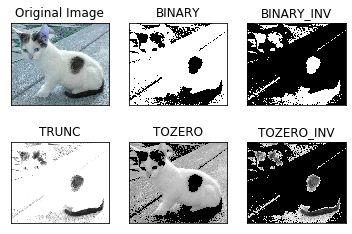

In [8]:
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## 图像平滑
#### 可以图像降噪，使图像更清晰，更平滑

In [23]:
noise_img = cv2.imread("../img/lenaNoise.png")

In [27]:
# 均值滤波（简单的平均卷积操作）
blur1 = cv2.blur(noise_img, (3,3))  # 3 * 3的卷积核
# 方框滤波，基本和均值一样，可以选择归一化
blur2 = cv2.boxFilter(noise_img,-1, (3,3), normalize=True)  # -1是固定值，一般不需要改变
# 方框滤波，基本和均值一样，可以选择归一化，容易越界(未取均值，超过255，一旦越界就取255)
blur3 = cv2.boxFilter(noise_img,-1, (3,3), normalize=False)

In [28]:
show_img([noise_img, blur1, blur2, blur3])

In [29]:
# 高斯滤波，更看重权重，离目标远的权重小，离目标近的权重大
gussian = cv2.GaussianBlur(noise_img, (5, 5), 1)
show_img([noise_img, gussian])

In [38]:
# 中值滤波
median = cv2.medianBlur(noise_img, 5)   # 5*5的卷积核
show_img([noise_img, median])

In [42]:
# 展示所有的
res = np.hstack((blur1,gussian,median))  # 水平拼接
cv2.imshow('median vs gussian vs median', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 形态学处理
- 处理二值化的图像
- 腐蚀=瘦身，膨胀=增肥

### 腐蚀（Erode）

In [72]:
img1 = cv2.imread("../img/dige.png")

In [86]:
kernel = np.ones((3,3), dtype=np.uint8)  # 卷积核
erosion = cv2.erode(img1, kernel, iterations=1)  # iterations：迭代（腐蚀）次数
show_img([img1, erosion])

In [4]:
# 不同腐蚀次数的变化
pie = cv2.imread("../img/pie.png")
kernel = np.ones((30,30),np.uint8) 
erosion_1 = cv2.erode(pie,kernel,iterations = 1)
erosion_2 = cv2.erode(pie,kernel,iterations = 2)
erosion_3 = cv2.erode(pie,kernel,iterations = 3)
show_img((pie, erosion_1,erosion_2,erosion_3))

### 膨胀（Dilate）
- 腐蚀完后膨胀恢复之前的结果，两者互为逆运算

In [74]:
dilate_kernel = np.ones((3,3), dtype=np.uint8)  # 卷积核
dilate_img = cv2.dilate(erosion, dilate_kernel, iterations=1)
show_img([img1, erosion, dilate_img])

In [13]:
# 不同膨胀次数的变化
pie = cv2.imread("../img/pie.png")
kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1)
dilate_2 = cv2.dilate(pie,kernel,iterations = 2)
dilate_3 = cv2.dilate(pie,kernel,iterations = 3)
show_img((pie,dilate_1,dilate_2,dilate_3))

### 开运算与闭运算
- 开运算：先腐蚀，后膨胀
    - 开运算可以用来去除仅存的小块像素。
- 闭运算：先膨胀，后腐蚀

In [97]:
open_close_kernel = np.ones((5,5), np.uint8)
openimg = cv2.morphologyEx(img1, cv2.MORPH_OPEN, open_close_kernel)  # 开运算
closeimg = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, open_close_kernel) # 闭运算
show_img([img1, openimg, closeimg])

### 梯度运算
- 梯度 = 膨胀 - 腐蚀
- 形态学梯度为经过膨胀操作（dilate）的图像与经过腐蚀操作（erode）的图像的差，可以用于抽出物体的边缘。

In [98]:
kernel = np.ones((7,7), np.uint8)
dilate_img = cv2.dilate(pie, kernel, iterations=5)
erode_img = cv2.erode(pie, kernel, iterations=5)
show_img((pie, dilate_img, erode_img))

In [99]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)
show_img((pie, dilate_img, erode_img,gradient))

### 顶帽和黑帽
- 顶帽 = 原始输入 - 开运算
- 黑帽 = 闭运算 - 原始输入

In [9]:
tophat = cv2.morphologyEx(img1, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img1, cv2.MORPH_BLACKHAT, kernel)
show_img((img1, tophat, blackhat))

NameError: name 'img1' is not defined

## 图像梯度

### Sobel算子
dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小

In [10]:
pie = cv2.imread("../img/pie.png", cv2.IMREAD_GRAYSCALE)
show_img([pie])

In [17]:
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize=3)  # dx=1,dy=0，只计算水平方向
show_img([pie, sobelx],hstack=True)

白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值

In [18]:
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize=3)  # dx=1,dy=0，只计算水平方向
sobelx = cv2.convertScaleAbs(sobelx)                # 不能丢弃负值，需要去绝对值
show_img([pie, sobelx],hstack=True)

In [19]:
sobely = cv2.Sobel(pie, cv2.CV_64F, 0, 1, ksize=3)  # dx=0,dy=1，只计算垂直方向
sobely = cv2.convertScaleAbs(sobely)                # 不能丢弃负值，需要去绝对值
show_img([pie, sobely],hstack=True)

In [21]:
# 分别计算x和y，再求和
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
show_img([pie, sobelxy], hstack=True)

In [23]:
# 不建议直接计算,效果不太好
sobelxy = cv2.Sobel(pie, cv2.CV_64F, 1, 1, ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)
show_img([pie, sobelxy], hstack=True)

In [35]:
lena = cv2.imread("../img/lena.jpg", cv2.IMREAD_GRAYSCALE)
# 分开计算
sobelx = cv2.Sobel(lena, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(lena, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy1 = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# 直接计算
sobelxy2 = cv2.Sobel(lena, cv2.CV_64F, 1, 1, ksize=3)
sobelxy2 = cv2.convertScaleAbs(sobelxy2)

show_img([lena, sobelxy1, sobelxy2], hstack=True)

In [43]:
lena = cv2.imread("../img/lena.jpg", cv2.IMREAD_GRAYSCALE)
# sobel算子
sobelx = cv2.Sobel(lena, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(lena, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy1 = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# Scharr算子
scharrx = cv2.Scharr(lena, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(lena, cv2.CV_64F, 0, 1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

# Laplacian算子
laplacian = cv2.Laplacian(lena, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

show_img([lena, sobelxy1, scharrxy, laplacian], hstack=True)

### Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和方向。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

In [11]:
lena  = cv2.imread("../img/lena.jpg", cv2.IMREAD_GRAYSCALE)

In [15]:
candy1 = cv2.Canny(lena, 50, 100)
candy2 = cv2.Canny(lena, 80, 150)
show_img([candy1, candy2], hstack=True)

### 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔

In [16]:
AM = cv2.imread("../img/AM.png")

In [24]:
AM = cv2.imread("../img/AM.png")
up = cv2.pyrUp(AM)
down = cv2.pyrDown(AM)
show_img([AM,up,down])

In [28]:
# 拉普拉斯金字塔
down = cv2.pyrDown(AM)
down_up = cv2.pyrUp(down)
ret = AM - down_up
show_img([AM,ret], hstack=True)

## 图像轮廓

#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

In [16]:
# 为了更高的准确率，使用二值图像。
img = cv2.imread("../img/car.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show_img([img, thresh])

In [17]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# contours：轮廓信息；hierarchy：层级

#### 绘制轮廓

In [18]:
# 注意需要copy,要不原图会变。。。
copy_img = img.copy()
res = cv2.drawContours(copy_img, contours, -1, (0,0,255), 2)
#传入绘制图像，轮廓，轮廓索引，颜色模式，线条厚度
# -1：所有的轮廓都画出来，0：对应的第0个轮廓，1：对应的第1个轮廓
# （0,0,255）：对应：B,G,R，轮廓的颜色（这里是红色）
# 2：线条宽度
show_img([img, res])

#### 轮廓特征

In [67]:
cnt = contours[0]
# 面积
area = cv2.contourArea(cnt)
# 周长，True：表示闭合的
perimeter = cv2.arcLength(cnt, True)
print("面积：",area)
print("周长：", perimeter)

面积： 1.5
周长： 5.414213538169861


#### 轮廓近似

In [24]:
img = cv2.imread("../img/contours2.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res1 = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
show_img([res])

In [27]:
epsilon = 0.1 * cv2.arcLength(cnt, True) 
approx = cv2.approxPolyDP(cnt, epsilon, True)

draw_img = img.copy()
res2 = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
show_img([img, res1, res2], hstack=True)

#### 边界矩形

In [28]:
img = cv2.imread("../img/contours.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0] # 0：第0个轮廓也就是这里的三角形的外接矩形（外轮廓）; 1：内轮廓（内接矩形）.....

x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
show_img([img])

In [6]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print ('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.5154317244724715


#### 外接圆

In [29]:
(x,y),radius = cv2.minEnclosingCircle(cnt) 
center = (int(x),int(y)) 
radius = int(radius) 
img = cv2.circle(img,center,radius,(0,255,0),2)
show_img([img])